# La catastrophe du Titanic
Le RMS Titanic est un paquebot transatlantique britannique qui fait naufrage dans l’océan Atlantique Nord en 1912 à la suite d’une collision avec un iceberg, lors de son voyage inaugural de Southampton à New York. C’est l’une des plus grandes catastrophes maritimes survenues en temps de paix et la plus grande pour l’époque. Le drame met en évidence l’insuffisance des règles de sécurité de l’époque, notamment le nombre insuffisant de canots de sauvetage et les carences dans les procédures d’évacuation d’urgence. 

Source : Wikipédia

<div class="alert alert-info">
<b>Travail à faire : </b> Exécuter le code dans la cellule suivante, 2 possibilités :
    <li> cliquer sur la petite flèche (bouton Run ou Exécuter)
   <li> appuyer simultanément sur les touches shift et entrée
</div>

In [ ]:
!pip install pandas
!pip install matplotlib

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas
csv_file = 'data/titanic-perso.csv' # stocke le chemin vers le fichier de données dans le répertoire data
data = pandas.read_csv(csv_file, sep =';')

Cette cellule de code importe les bibliothèques nécessaires au traitement des données :
* pyplot pour faire des fichiers
* pandas pour traiter les données du fichier csv

Puis on stocke les informations du fichier csv dans un objet appelé ici __data__ (type d'objet = dataframe de pandas).

En écrivant le nom de la variable on peut voir comment sont organisées les donnéees :

In [2]:
data

,classe,survie,nom,sexe,age,tarif
0,1,1,"Allen, Miss. Elisabeth Walton",2,29.0,211.0
1,1,1,"Allison, Master. Hudson Trevor",1,1.0,152.0
2,1,0,"Allison, Miss. Helen Loraine",2,2.0,152.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0,152.0
4,1,0,"Allison, Mrs. Hudson Bessie Waldo Daniels",2,25.0,152.0
...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",2,15.0,14.0
1305,3,0,"Zabour, Miss. Thamine",2,19.0,14.0
1306,3,0,"Zakarian, Mr. Mapriededer",1,27.0,7.0
1307,3,0,"Zakarian, Mr. Ortin",1,27.0,7.0


<div class="alert alert-info">
<b>Travail à faire : </b> Après avoir exécuté le code dans les cellules précédentes, répondre aux questions de la fiche.
       <li> Quels sont les descripteurs ?
       <li> Sachant que Miss. Elisabeth Walton Allen a survécu au naufrage, que signifie le nombre 1 pour le descipteur survie ?
</div>


<div class="alert alert-info">
<b>Travail à faire : </b> Après avoir modifié le code dans la cellule suivante, répondre aux questions de la fiche.
       <li> Faire une phrase décrivant la personne correspondant à l'objet 314 de la base de données et son destin
</div>


In [25]:
data.loc[2] #

classe                               1
survie                               0
nom       Allison, Miss. Helen Loraine
sexe                                 2
age                                  2
tarif                              152
Name: 2, dtype: object

La commande `.describe()` permet d'obtenir rapidement des informations sur les données.

* _mean_ signifie moyenne
* _std_ correspond à l'écart-type
* _min_ et_max_ ont un sens évident
* _25 %_, _50 %_ et _75 %_ permettent de classer les données en quartiles.

In [4]:
data.describe()

,classe,survie,sexe,age,tarif
count,1309.000000,1309.000000,1309.000000,1306.000000,1308.000000
mean,2.294882,0.381971,1.355997,29.633997,33.363150
std,0.837836,0.486055,0.478997,13.957820,51.751529
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,21.000000,8.000000
50%,3.000000,0.000000,1.000000,28.000000,14.000000
75%,3.000000,1.000000,2.000000,38.000000,31.000000
max,3.000000,1.000000,2.000000,80.000000,512.000000


<div class="alert alert-info">
<b>Travail à faire : </b> Après avoir exécuter le code dans les cellules précédentes, répondre aux questions de la fiche.
       <li> L’âge moyen des passagers
       <li> Le tarif moyen payé
       <li> L'age du passager le plus agé
       <li> Le taux moyen de survie (pourcentage exprimé entre 0 et 1)
</div>


Il est possible d'obtenir des résultats similaires avec la commande suivante :

In [5]:
data['age'].mean()

29.633996937212864

<div class="alert alert-info">
<b>Travail à faire : </b> 
    <li> écrire le code Python pour obtenir la moyenne de l'indicateur survie
</div>


In [6]:
# Ecrire votre code ici

# Influence de la classe sociale sur la survie :
Il n’y avait pas suffisamment de places dans les canots de sauvetage du Titanic pour tous les passagers et les membres de l’équipage (et certains canots sont partis à peine remplis).

On souhaite  examiner l’influence de la classe sociale des passagers notamment sur la survie. Pour cela on va filtrer les données selon la classe et afficher les valeurs moyennes des différents descripteurs.

<div class="alert alert-info">
<b>Travail à faire :  </b> 
    <li> Exécuter les lignes de code suivantes
    <li> Compléter le tableau de la fiche réponse
        
</div>


In [8]:
gr1 = data.groupby(['classe']).mean()

In [9]:
gr1 # pour afficher le résultat

,survie,sexe,age,tarif
classe,,,,
1,0.619195,1.445820,39.464396,87.594427
2,0.429603,1.382671,29.566787,21.314079
3,0.255289,1.304654,25.162890,13.336158


# Influence du sexe sur la survie :
Dans le film de James Cameron, lors de l’évacuation du Titanic, on voit que les femmes embarquent davantage sur les canots que les hommes. On peut donc supposer que la fréquence de survie pour les femmes a été supérieure à celle des hommes. Est-ce la réalité ?

Répondre en adoptant une démarche similaire à celle utilisée à la question précédente.

<div class="alert alert-info">
<b>Travail à faire :  </b> 
    <li> proposer une ligne de code (ci-dessous)
    <li> Compléter la fiche réponse
        
</div>


In [10]:
#votre code ici

On peut avoir encore plus d'informations en analysant la survie selon le sexe et la classe :

In [12]:
gr3 = data.groupby(['classe','sexe']).mean()
gr3

survie        age       tarif
classe sexe                                 
1      1     0.340782  41.117318   70.011173
       2     0.965278  37.409722  109.451389
2      1     0.146199  30.690058   20.064327
       2     0.886792  27.754717   23.330189
3      1     0.152130  26.102041   12.449187
       2     0.490741  23.032407   15.356481

Les inégalités sont très fortes selon la classe. Alors que 49 % des femmes de 3ème classe vont survivre, 89 % des femmes de 2nde classe et 97 % des femmes de 1ère classe vont survivre !
Les canots de sauvetage étaient donc essentiellement composés de passagères de 1ère et 2ème classe. . . 


# Recherche d'un passager selon des critères :
On veut rechercher le passager le plus agé, de classe 3 et ayant survécu.
Ci-dessous unexemple de ligne de code qui permet de trier la base de données.

Dans le cas ci-dessous, nous avons trié par age croissant, par classe décroissante et par survie décroissante (survivants en premier).

Nous avons ainsi obtenu le plus jeune passager de classe 3 à avoir survécu.

In [13]:
data.sort_values(['age','classe','survie', ],ascending = [True, False, False] )

,classe,survie,nom,sexe,age,tarif
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",2,0.0,21.0
1240,3,1,"Thomas, Master. Assad Alexander",1,0.0,9.0
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",1,0.0,14.0
611,3,1,"Aks, Master. Philip Frank",1,1.0,9.0
657,3,1,"Baclini, Miss. Eugenie",2,1.0,19.0
...,...,...,...,...,...,...
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",2,76.0,79.0
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",1,80.0,30.0
816,3,0,"Gheorgheff, Mr. Stanio",1,NaN,8.0
940,3,0,"Kraeff, Mr. Theodor",1,NaN,8.0


<div class="alert alert-info">
<b>Travail à faire :  </b> 
    <li> Proposer ci-dessous une ligne de code pour obtenir le passager le plus agé de classe 3 ayant survécu
    <li> Compléter la fiche réponse
        
</div>


In [14]:
#votre code ici

<div class="alert alert-success">
<b>Félicitations ! Vous êtes arrivé au bout du travail demandé. N'oubliez pas de :  </b> 
    <li> Compléter le tableau de la fiche réponse
</div>


Envie d'en découvrir plus...

Une autre façon de trouver la personne la plus agée ayant survécu au naufrage et en classe 3 :

In [29]:
data[ data.classe.eq(3) & data.survie.eq(1)].sort_values('age', ascending = False)

,classe,survie,nom,sexe,age,tarif
1261,3,1,"Turkula, Mrs. (Hedwig)",2,63.0,10.0
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,7.0
742,3,1,"Dahl, Mr. Karl Edwart",1,45.0,8.0
851,3,1,"Hansen, Mrs. Claus Peter (Jennie L Howard)",2,45.0,14.0
647,3,1,"Assaf Khalil, Mrs. Mariana (""Miriam"")",2,45.0,7.0
...,...,...,...,...,...,...
1187,3,1,"Sandstrom, Miss. Beatrice Irene",2,1.0,17.0
1048,3,1,"Nakid, Miss. Maria (""Mary"")",2,1.0,16.0
657,3,1,"Baclini, Miss. Eugenie",2,1.0,19.0
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",2,0.0,21.0


On peut compter le nombre de passagers selon un critère

In [17]:
data['sexe'].value_counts()

1    843
2    466
Name: sexe, dtype: int64

Proposer un code qui permet de connaitre le nombre de survivants et de décès :

In [18]:
#votre code ici

On peut tracer des histogrammes avec matplotlib :

Exemple : histogramme des tarifs des billts

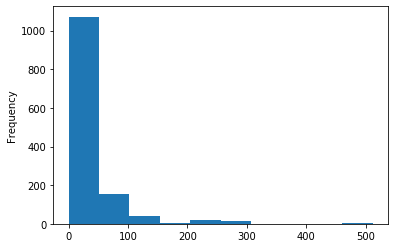

In [20]:
data['tarif'].plot(kind="hist")
plt.show()

Proposer un code qui affiche l'histogramme des tarifs des cabines :

In [21]:
#votre code ici

On peut améliorer la compréhension des relations entre les données avec une bibliothèque de traitement des données : seaborn

In [23]:
!pip install seaborn
import seaborn as sns # Visualisation des données

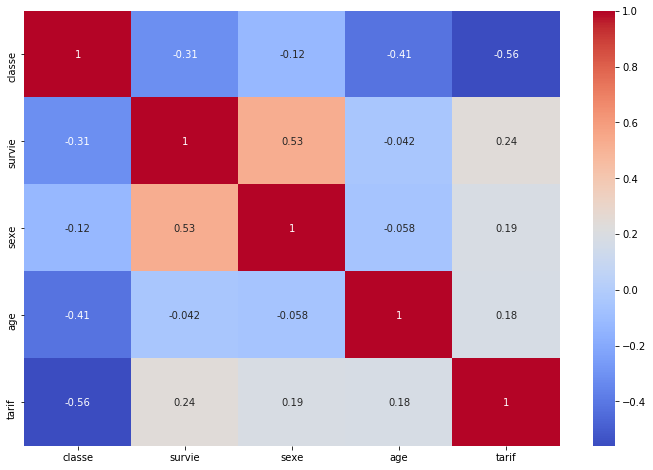

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

## C'est joli mais comment on l'utilise ?

Une matrice de corrélation est utilisée pour évaluer la dépendence entre plusieurs variables en même temps. <br>
Le résultat est une table contenant les coefficients de corrélation entre chaque variable et les autres. <br>

Le résultat 1 correspond à une corrélation parfaite entre les données : sur la diagonale, on compare des données identiques : c'est donc forcément 100 %  de corrélation <br>
Le résultat 0 correspond à l'absence de corrélation.
Un résultat négatif -1 correspond à une corrélation négative : plus une valeur est grande, plus l'autre est petite.

Autre exemple : on voit la corrélation entre le sexe et la survie : un taux de corrélation de 0,53 qui signifie que plus le sexe est élevé (2 pour femme contre 1 pour homme) plus la survie est élevée ( 1 pour survie et 0 pour décès).

Comment interpréter alors  :
1) la corrélation négative entre le tarif et la classe ? <br>
2) La corrélation négative entre la survie et la classe ?